In [21]:
import os
import sys
sys.path.append('../')
import yaml
import uproot
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pileup_utils import *
import mplhep 
mplhep.style.use('CMS')
from coffea.nanoevents import NanoEventsFactory, BaseSchema, NanoAODSchema

PileupHistogram-goldenJSON-13tev-2018-66000ub-99bins.root
PileupHistogram-goldenJSON-13tev-2018-69200ub-99bins.root
PileupHistogram-goldenJSON-13tev-2018-72400ub-99bins.root
PileupHistogram-goldenJSON-13tev-2018-80000ub-99bins.root


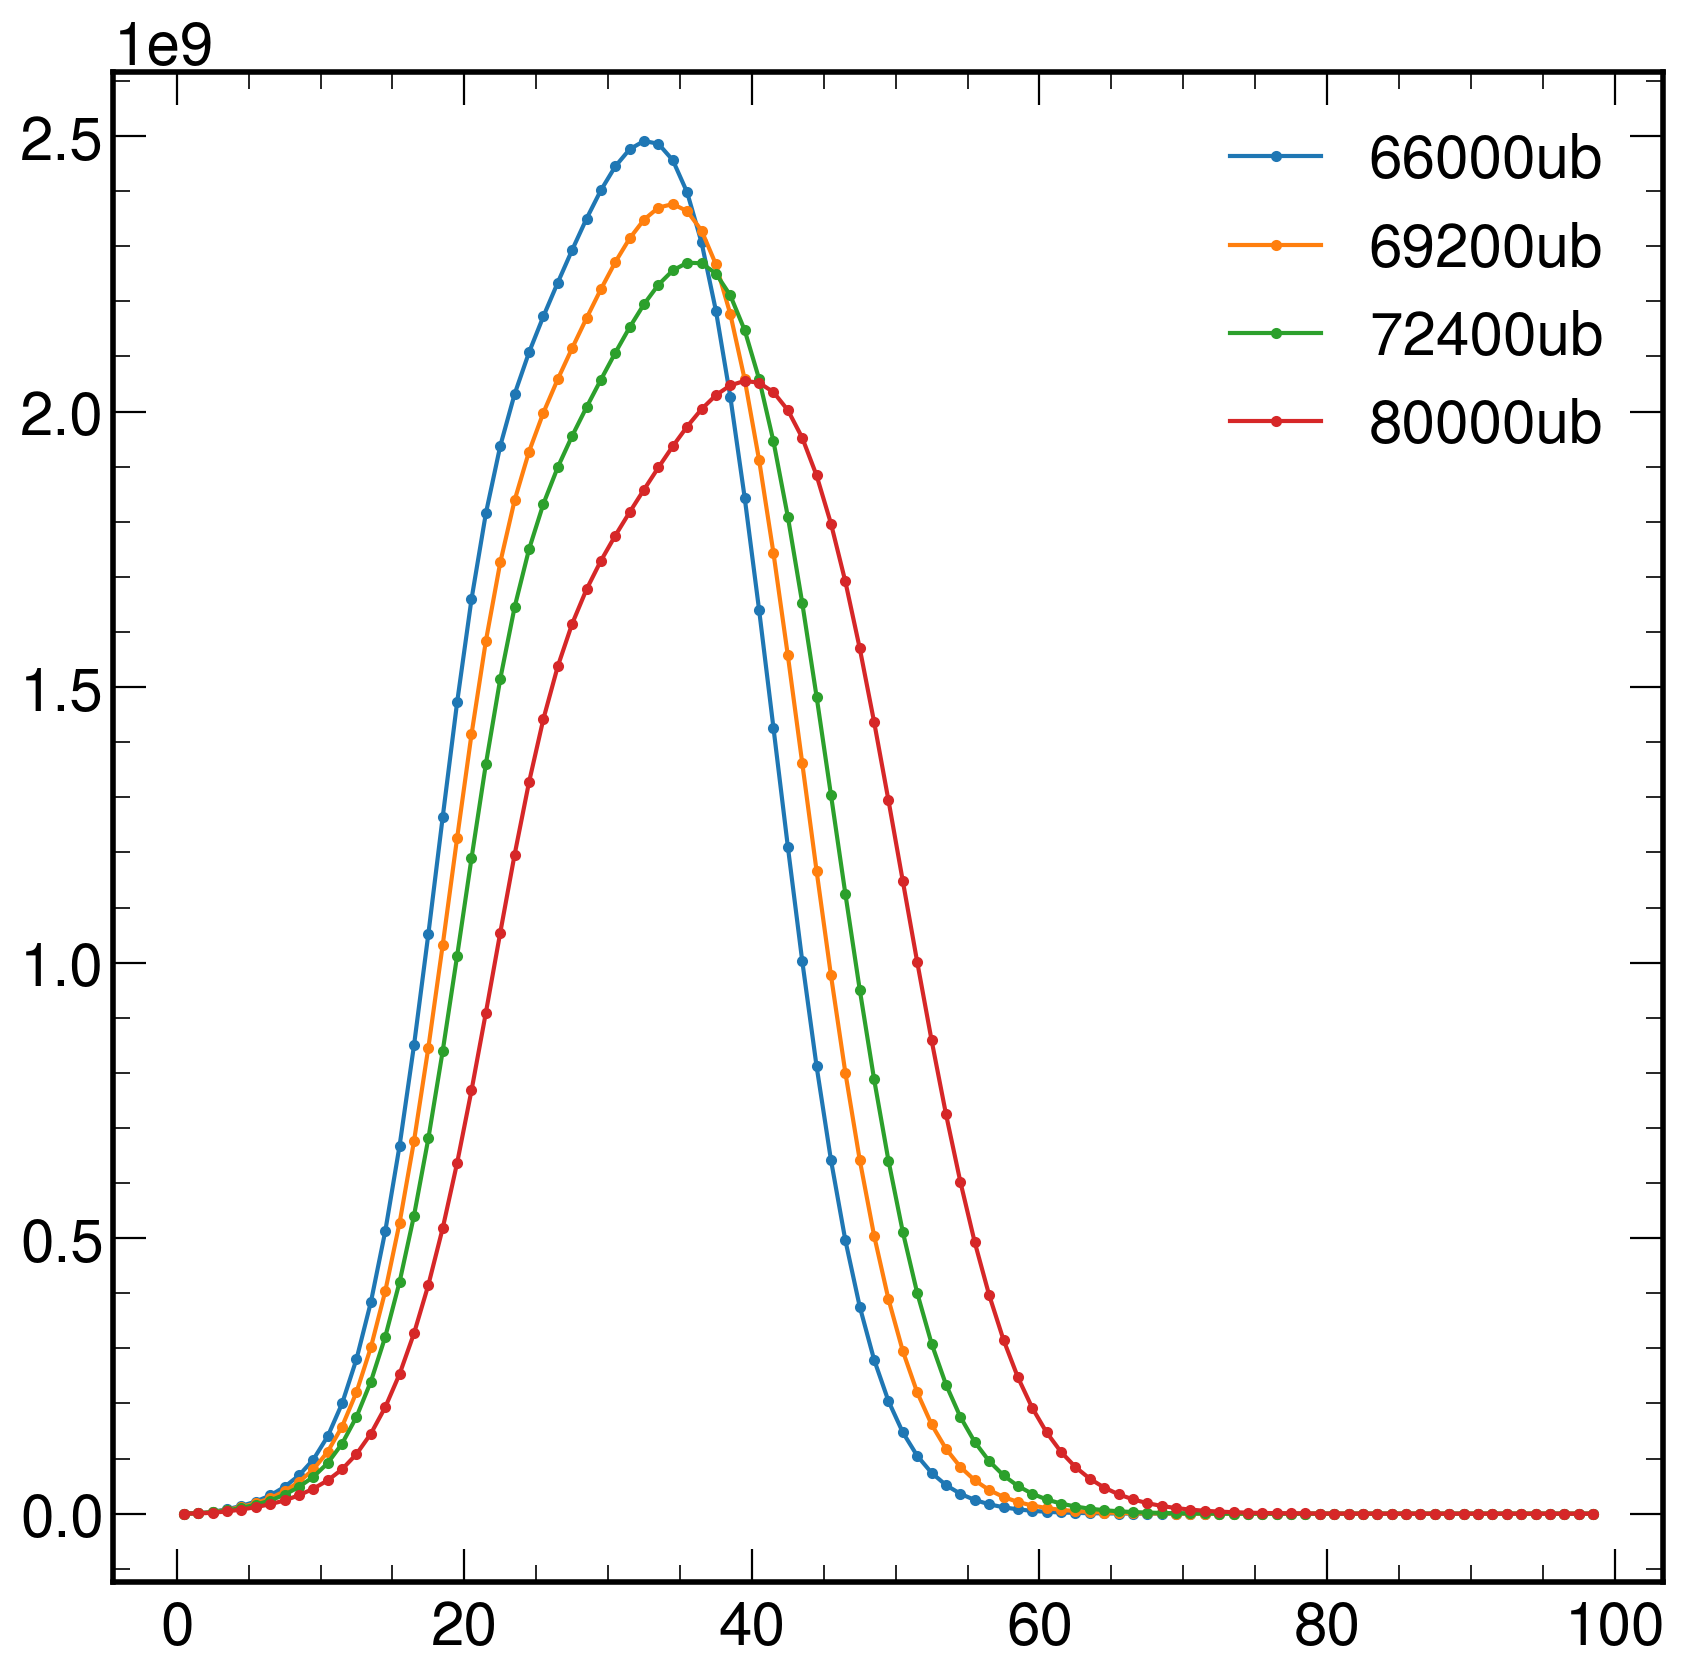

In [22]:
# plot pileup, labels are the inelastic cross section (69.2mb recommended w/ +/- 4.6% shifts)
indir = 'UL_2018'
fig = plt.figure(dpi=200)
for file in os.listdir(indir):
    if '.root' not in file: continue
    pu = uproot.open(os.path.join(indir, file))
    pu = pu['pileup;1'].to_numpy()
    print(file)
    plt.plot((pu[1][:-1] + pu[1][1:])/2., pu[0], marker='.', 
             label=file.split('ub')[0].split('-')[-1] + 'ub')

plt.legend(loc='best')
plt.show()

In [23]:
from utils.sample_utils import *
indir = "../sample_lists/sample_yamls"

mc_fileset = get_fileset(os.path.join(indir, "MC_UL_2018.yaml"),
                         process='TTTo')
data_fileset = get_fileset(os.path.join(indir, "data_UL_2018.yaml"),
                           process='SingleMuonB')

In [24]:
nTrueInt = []
genWeights = []
nTrueInt = get_fileset_array(mc_fileset, 'Pileup', variable='nTrueInt')
genWeight = get_fileset_array(mc_fileset, 'genWeight')

OSError: XRootD error: [ERROR] Operation expired
in file root://cmsxrootd-site.fnal.gov//store/mc/RunIISummer20UL18NanoAODv9/TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/130000/44187D37-0301-3942-A6F7-C723E9F4813D.root

/tmp/ipykernel_12236/2895437824.py:18: RuntimeWarning: divide by zero encountered in true_divide
  ratios = (pu_data[0]/integral)/pu_MC[0]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


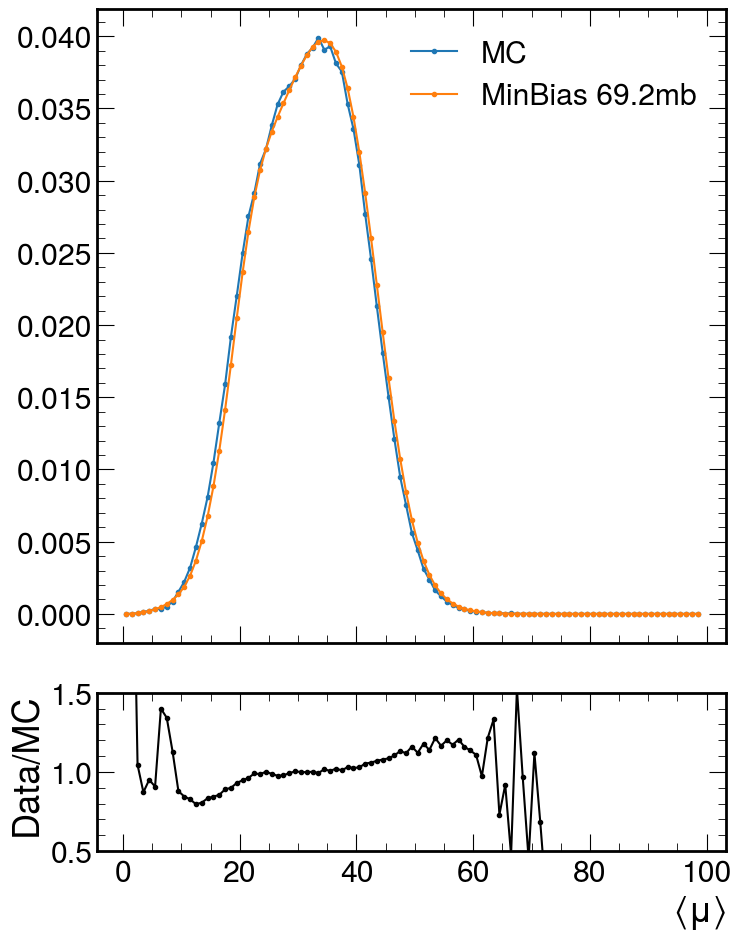

In [12]:
# histogram the true <mu> for each MC event
bins = np.arange(0, 100, 1)
pu_MC = np.histogram(nTrueInt, bins=bins, density=True)

# plot it on a figure
fig, axs = plt.subplots(dpi=100, nrows=2, figsize=(8, 10), gridspec_kw={'height_ratios': [4,1]},
                        sharex=True)
axs[0].plot((pu_MC[1][:-1] + pu_MC[1][1:])/2., pu_MC[0], marker='.', 
             label='MC')

# plot pileup files
pu_data = open_pileup_file('2018', UL=True, shift=None)
integral = np.sum(pu_data[0])
axs[0].plot((pu_data[1][:-1] + pu[1][1:])/2., pu_data[0]/integral, marker='.', 
             label='MinBias 69.2mb')

#print(get_pileup_weights(nTrueInt, '2018'))
ratios = (pu_data[0]/integral)/pu_MC[0]
axs[1].plot((pu[1][:-1] + pu[1][1:])/2., ratios, marker='.',
             color='black')

axs[0].legend(loc='best')
axs[1].set_ylim([0.5, 1.5])
axs[1].set_ylabel('Data/MC')
axs[1].set_xlabel(r'$\langle \mu \rangle$')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [13]:
nPV_MC = get_fileset_array(mc_fileset, 'PV', 'npvs')
nTrueInt = get_fileset_array(mc_fileset, 'Pileup', 'nTrueInt')
nPV_data = get_fileset_array(data_fileset, 'PV', 'npvs')

/uscms_data/d3/jdezoort/AZh_columnar/CMSSW_10_2_9/src/AZh_Princeton/pileup/pileup_utils.py:22: RuntimeWarning: divide by zero encountered in true_divide
  ratios = (pileup_data/integral_data)/pileup_MC
/tmp/ipykernel_12236/2550202553.py:26: RuntimeWarning: invalid value encountered in true_divide
  ratios = (hist_MC[0]/int_MC)/(hist_data[0]/int_data)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


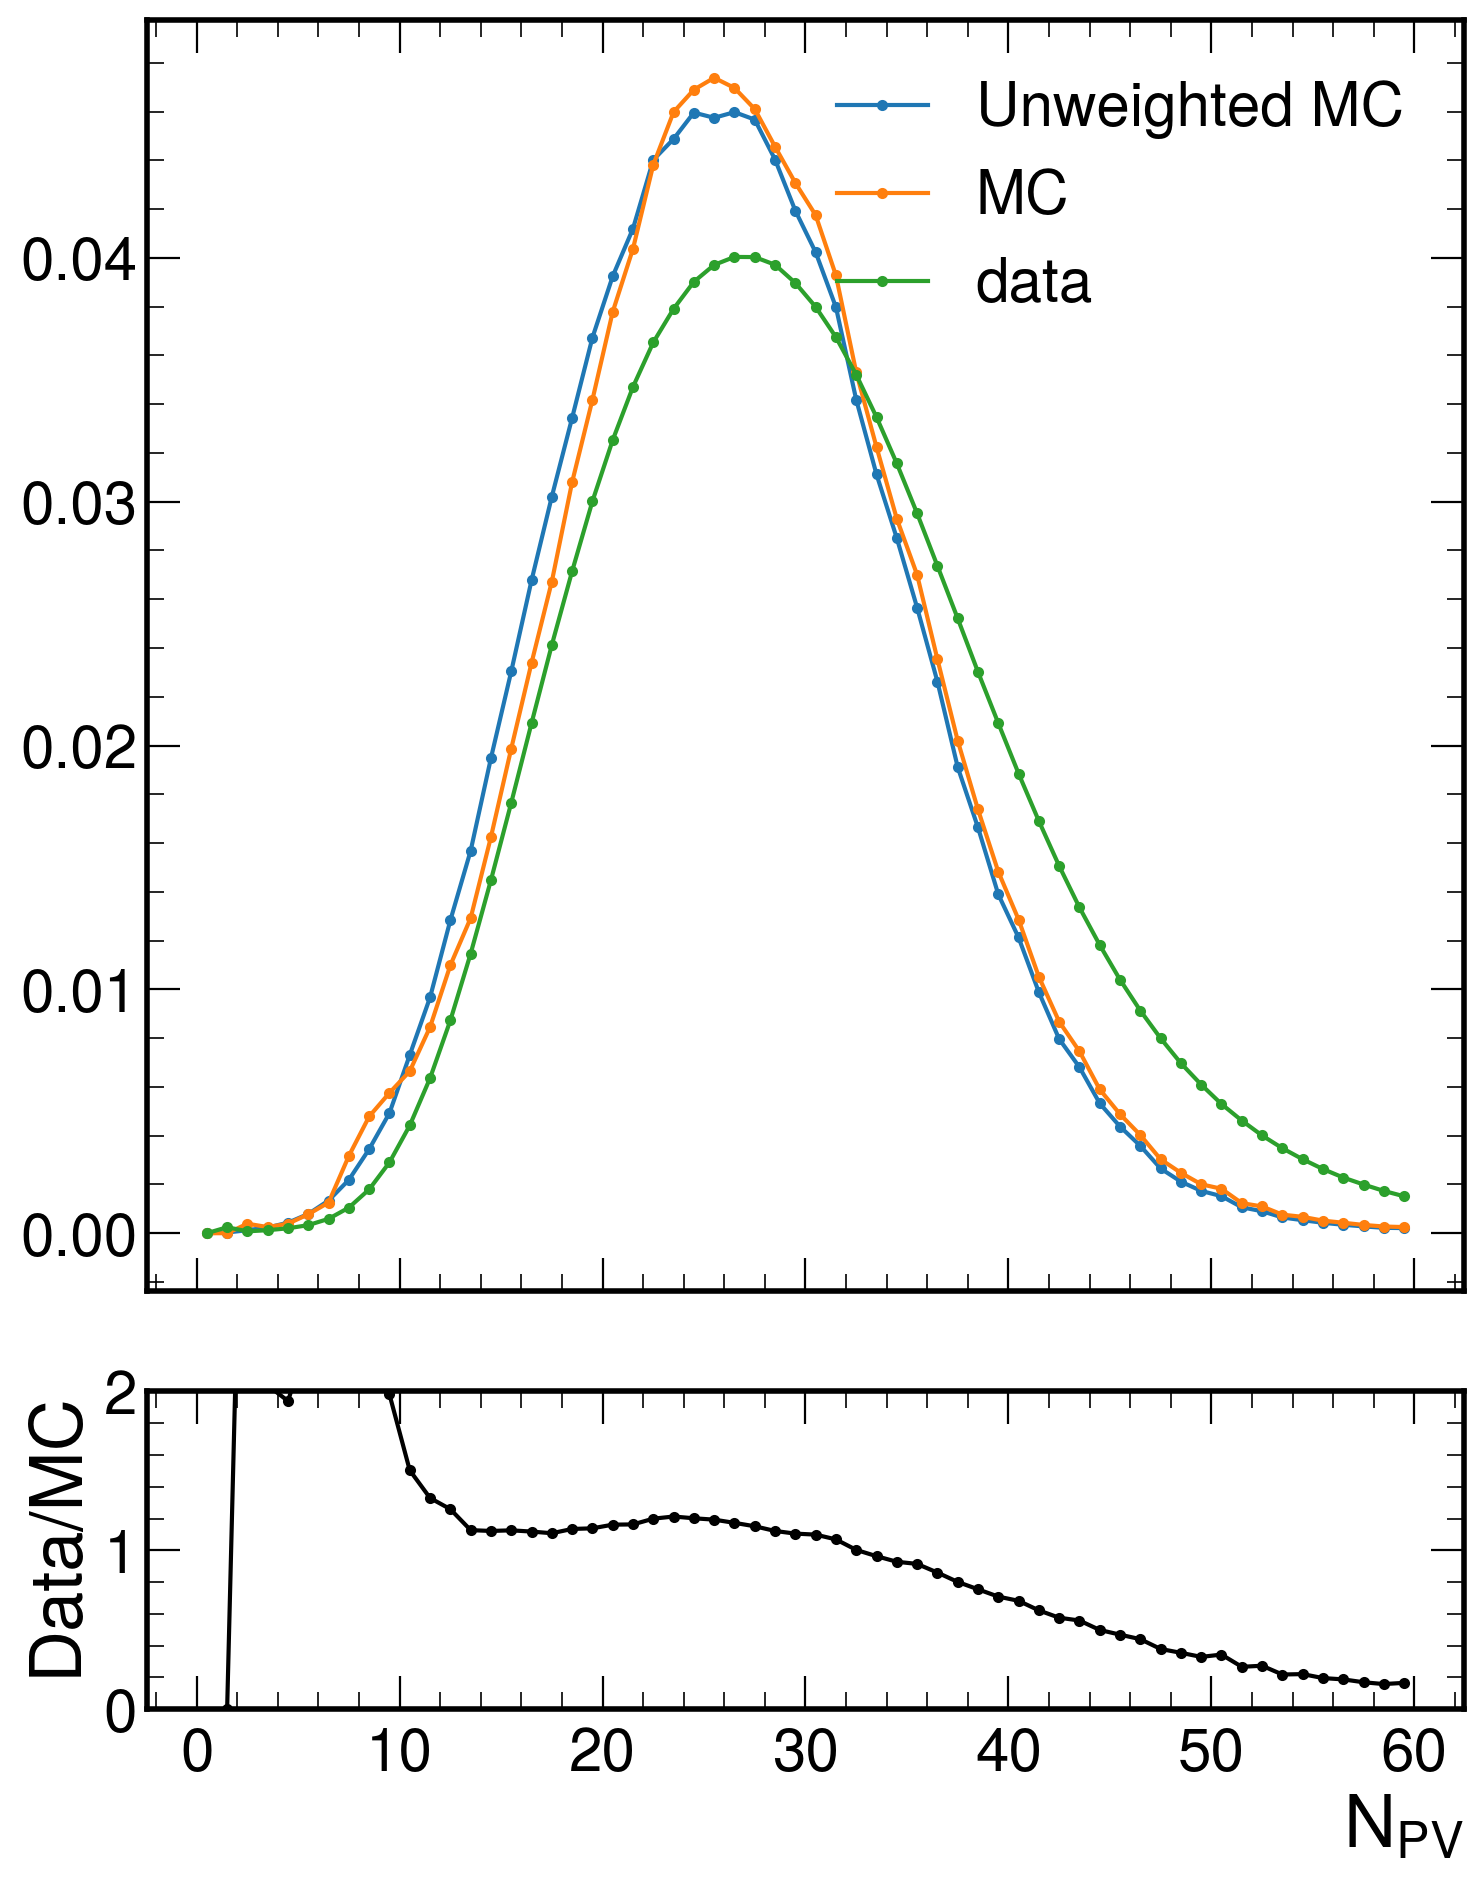

In [14]:
pu_bin_weights, pu_bins = get_pileup_weight_table(nTrueInt, '2018')
pu_weights = get_pileup_weights(nPV_MC, pu_bin_weights, pu_bins)

hist_uMC = np.histogram(nPV_MC, bins=np.arange(0, 100, 1))
hist_MC = np.histogram(nPV_MC, bins=np.arange(0,100,1), weights=pu_weights)
hist_data = np.histogram(nPV_data, bins=np.arange(0, 100, 1))

hist_uMC = (hist_uMC[0][0:60], hist_uMC[1][0:61])
hist_MC = (hist_MC[0][0:60], hist_MC[1][0:61])
hist_data = (hist_data[0][0:60], hist_MC[1][0:61])

int_MC = np.sum(hist_MC[0])
int_data = np.sum(hist_data[0])
int_uMC = np.sum(hist_uMC[0])

# plot corrected number of vertices
fig, axs = plt.subplots(dpi=200, nrows=2, figsize=(8, 10), gridspec_kw={'height_ratios': [4,1]},
                        sharex=True)
axs[0].plot((hist_uMC[1][:-1] + hist_uMC[1][1:])/2., hist_uMC[0]/int_uMC, marker='.', 
             label='Unweighted MC')
axs[0].plot((hist_MC[1][:-1] + hist_MC[1][1:])/2., hist_MC[0]/int_MC, marker='.', 
             label='MC')
axs[0].plot((hist_data[1][:-1] + hist_data[1][1:])/2., hist_data[0]/int_data, marker='.',
             label='data')

ratios = (hist_MC[0]/int_MC)/(hist_data[0]/int_data)
axs[1].plot((hist_MC[1][:-1] + hist_MC[1][1:])/2., ratios, marker='.',
             color='black')

axs[0].legend(loc='best')
axs[1].set_ylim([0, 2])
axs[1].set_ylabel('Data/MC')
axs[1].set_xlabel(r'$N_{PV}$')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
from coffea.lookup_tools import extractor

In [ ]:
ext = extractor()
ext.add_weight_sets